In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [ ]:
df = pd.read_csv('.\winequality-white.csv', delimiter = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


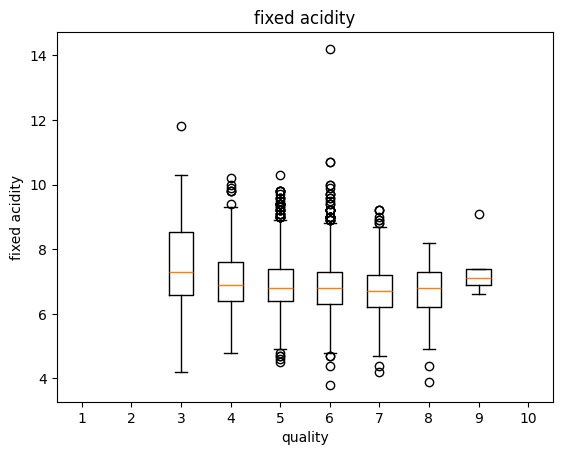

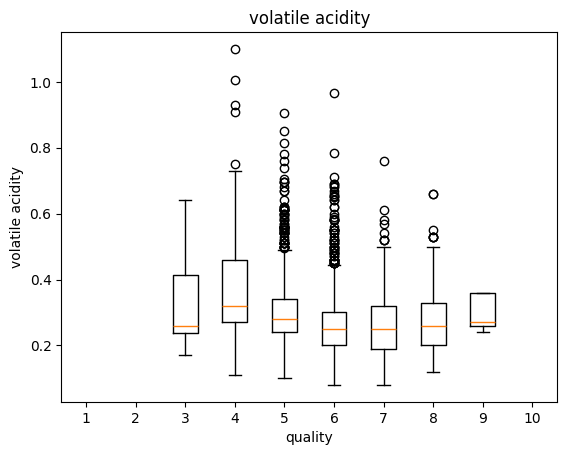

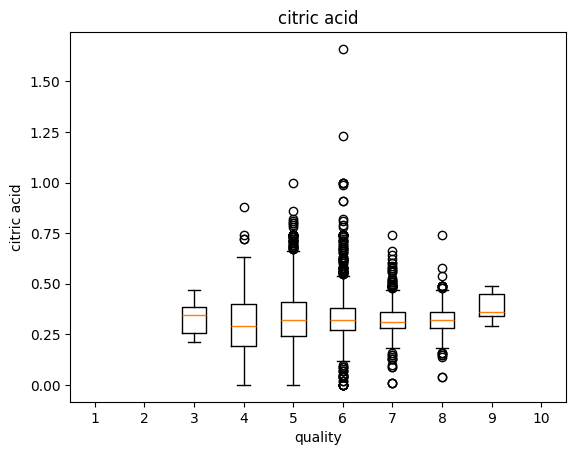

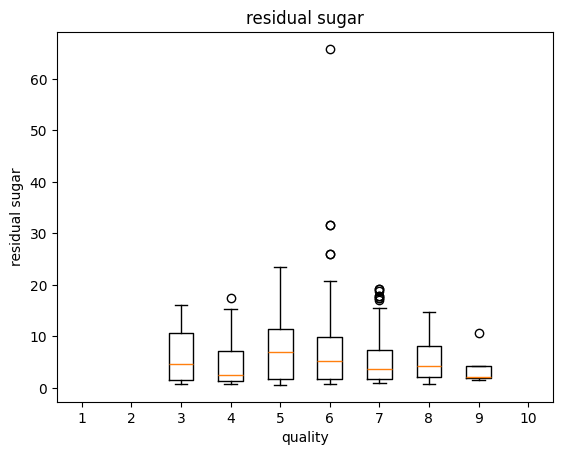

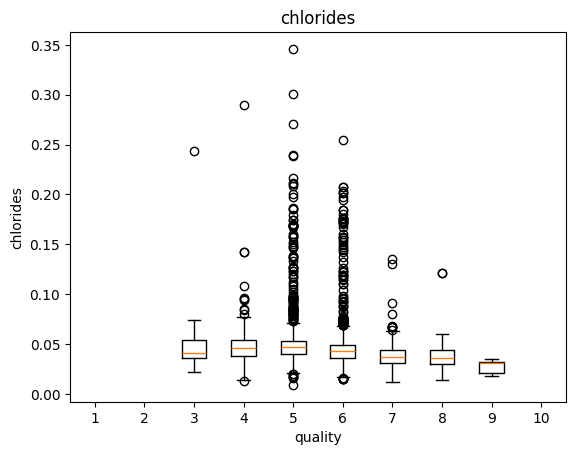

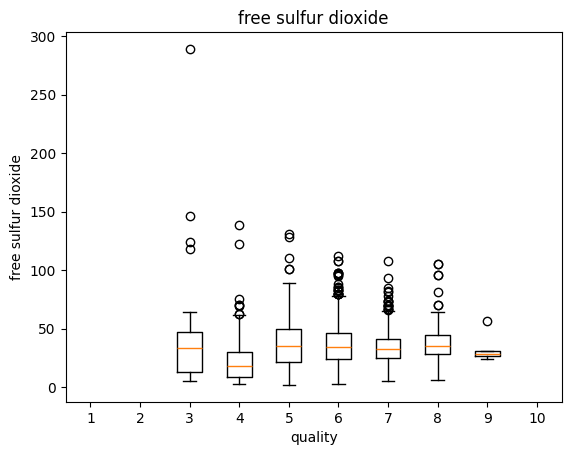

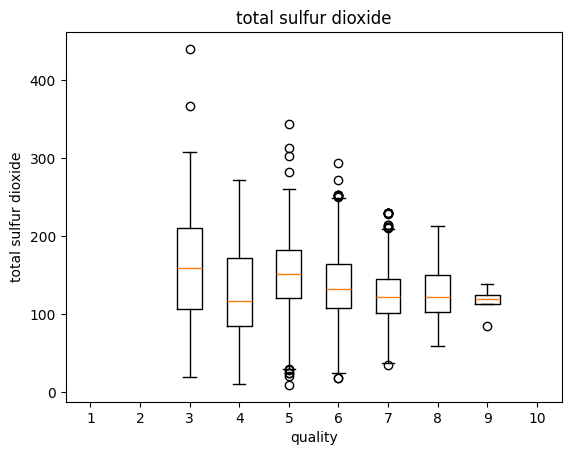

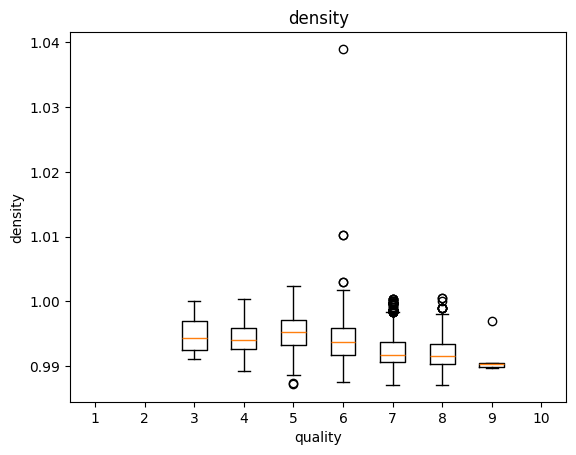

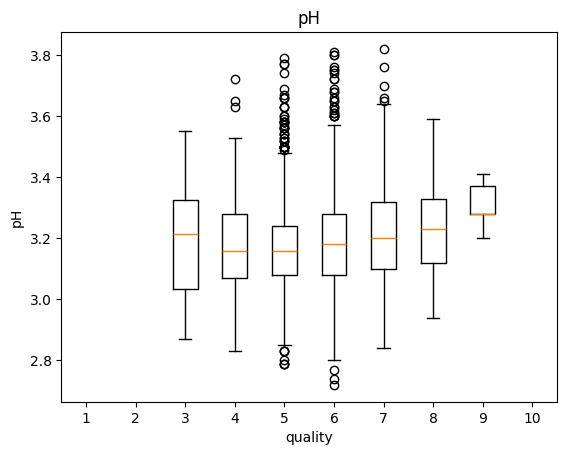

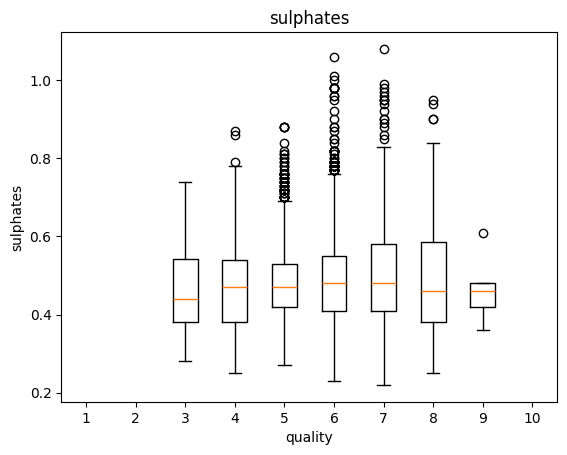

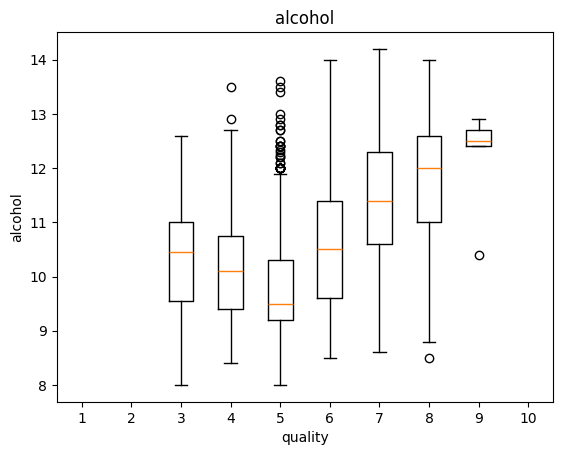

In [15]:
for label in df.columns[:-1]:
    plt.boxplot([df[df['quality'] == i][label] for i in range(1, 11)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'white'.join(label.split(' ')))
    plt.show()

In [16]:
bins = [0.0, 5.5, 7.5, 10.0]
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [20]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


For Classification I am using the 
## k nearest neighbors..

In [25]:
n3 = KNeighborsClassifier(n_neighbors=3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(n3, x, y, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.6596702975668796


In [26]:
n3 = KNeighborsClassifier(n_neighbors=3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(n3, x, y, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.6596702975668796


 Even though neighbors are 10, it doesn't give better results...
 # Random forest

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(rf, x, y, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       321
           1       0.84      0.90      0.87       624
           2       0.94      0.43      0.59        35

    accuracy                           0.83       980
   macro avg       0.86      0.69      0.74       980
weighted avg       0.83      0.83      0.82       980

0.7252055423396352


# Decision Tree

In [28]:
dt =  DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(dt, x, y, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       321
           1       0.81      0.79      0.80       624
           2       0.42      0.49      0.45        35

    accuracy                           0.74       980
   macro avg       0.63      0.65      0.64       980
weighted avg       0.74      0.74      0.74       980

0.6143491507032259
